# IP3 ODE Model

This is the ODE system for the glutamate GPCR receptor/IP$_3$ generation inside of an astrocyte. The model is based on the following diagram:

<img src="figures/drawings_misc/full_ip3_ode.jpg" width=600 />

And the channels involved in the IP$_3$ driven calcium pumping following the cartoon

<img src="figures/drawings_misc/calcium_cytoplasm_cartoon.jpg" width=400 />

## IP$_3 \rightarrow$ Ca$^{2+}$ Model

These sets of variables and equations model how a certain IP3 transient gives rise to dynamics of calcium concentrations in cytosol and ER

|Variable|Meaning|Python variable name|
|---|---|---|
|$c$|Cytosolic calcium concentration $[Ca^{2+}]_{cyt}$ |c|
|$c_{ER}$|ER calcium concentration $[Ca^{2+}]_{ER}$ |c_er|
|$c_{tot}$|Total free calcium|c_tot|
|$p$|IP$_3$ concentration $[IP_3]$|p|
|$h$|Deactivating channel parameter for IP3R channel (the Handy paper is missing this in the equation)|h|

ODE modeling parameters

|Parameter|Meaning|Python variable name|Value|Units
|---|---|---|---|---|
|$\gamma$|Ratio of (Cyt vol)/(ER vol)|gamma|5.4054| - |
|$v_{IP3R}$|Max IP$_3$ receptor flux|v_ip3r|0.222|s$^{-1}$|
|$v_{ER leak}$|Cytosol to ER leak rate|v_leak|0.002|s$^{-1}$|
|$v_{in}$|Rate of leak into cytosol from plasma membrane|v_in|0.05|$\mu$Ms$^{-1}$|
|$k_{out}$|Rate of leak out of cytosol from  plasma membrane|k_out|1.2|s$^{-1}$|
|$v_{SERCA}$|Max SERCA flux|v_serca|0.9|$\mu$Ms$^{-1}$|
|$k_{SERCA}$|Half-saturation for SERCA|k_serca|0.1|$\mu$M|
|$v_{PMCA}$|Max PMCA flux|v_pmca|10|$\mu$Ms$^{-1}$|
|$k_{PMCA}$|Half-saturation for PMCA|v_pmca|2.5|$\mu$M|
|$v_{SOC}$|Max SOC channels flux|v_soc|1.57|$\mu$Ms$^{-1}$|
|$k_{SOC}$|Half-saturation for SOC channels|k_soc|90|$\mu$M|
|$\delta$|Ratio of membrane transport to ER transport|delta|0.2|-|
|$d_1$|Dissociation constant for IP$_3$|d1|0.13|$\mu$M|
|$d_2$|Dissociation constant for Ca$^{2+}$ inhibition|d2|1.049|$\mu$M|
|$d_3$|Receptor dissociation constant for IP$_3$|d3|0.9434|$\mu$M|
|$d_5$|Ca$^{2+}$ activation constant|d5|0.08234|$\mu$M|
|$a_2$|Ca$^{2+}$ inhibition constant|a2|0.04|$\mu$Ms$^{-1}$|

The ODE equations for IP$_3$/Ca$^{2+}$ dynamics are
$$
\begin{align}
\frac{dc}{dt} &= J_{IP3R} + J_{ERleak} - J_{SERCA} \quad + \delta [J_{ECSadd} - J_{PMCA} + J_{SOC}] \\
\frac{dc_{tot}}{dt} &= \delta [J_{ECSadd} - J_{PMCA} + J_{SOC}] \\
\frac{dh}{dt} &= \frac{h_{\infty} - h}{\tau_h}
\end{align}
$$
Where the $J_i$s are the fluxes through the given channels (corresponding to the above cartoon) and are given by
$$
\begin{align}
J_{IP3R} &= v_{IP3R} m_{\infty}^3 n_{\infty}^3 h^3 (c_{ER} - c) \\
m_{\infty} &= \frac{p}{p+d_1}, \quad n_{\infty} = \frac{c}{c+d_5} \\
J_{SERCA} &= v_{SERCA} \frac{c^{1.75}}{c^{1.75} + k_{SERCA}^{1.75}} \\ 
J_{PMCA} &= v_{PMCA} \frac{c^2}{c^2 + k_{PMCA}^2} \\
J_{SOC} &= v_{SOC} \frac{k_{SOC}^2}{k_{SOC}^2 + c_{ER}^2} \\
J_{ERleak} &= v_{ERleak}(c_{ER} - c)\\
J_{ECSadd} &= v_{in} - k_{out}c
\end{align}
$$
and finally we have the deactivation parameters related to $h$ for the IP3R channel
$$
\begin{align}
\tau_h = \frac{1}{a_2(Q_2 + c)}, \quad h_{\infty} = \frac{Q_2}{Q_2 + c} \\
Q_2 = d_2(\frac{p+d_1}{p+d_3})
\end{align}
$$

## Glutamate GPCR ODE model

These parameters and equations give the pathway for GPCR activation of glutamate that causes the IP3 concentration transient

|Variable|Meaning|Python variable name|
|---|---|---|
|$G$|Inactivate glutamate receptor|G|
|$G^*$|Activated glutamate receptor|Gstar|
|$G_{d1}$|Deactivated (homologous) receptor|Gd1|
|$G_{d2}$|Deactivated (heterlogous) receptor|Gd2|

|Parameter|Meaning|Python variable name
|---|---|---|
|$k_+$|Activation constant $G \rightarrow G^*$|kp|
|$k_-$|Inactivation constant $G^* \rightarrow G$|km|
|$\phi$|Concentration of glutamate|glut|
|$k_{d1}$|Deactivation (homologous) $G^* \rightarrow G_{d1}$|kd1|
|$k_{r1}$|Reactivation $G_{d1} \rightarrow G$|kr1|
|$k_{d2}$|Deactivation (heterlogous) $G \rightarrow G_{d2}$|kd2|
|$k_{r2}$|Reactivation $G_{d2} \rightarrow G$|kr2|

The ODE equations are as following:
$$ 
\begin{align}
\frac{dG^*}{dt} &= k_+ \phi G - k_- G^* - k_{d1} G^* \\
\frac{dG_{d1}}{dt} &= k_{d1}G^* - k_{r1} G_{d1} \\
\frac{dG_{d2}}{dt} &= k_{d2}G^* G - k_{r2} G_{d2}
\end{align}
$$
and $G$ is given implicitly as $G = 1 - G^* - G_{d1} - G_{d2}$

## GPCR $\rightarrow$ IP$_3$ dynamics

These sets of variables and equations will dictate how the values of $G^*$ give rise to the IP$_3$ transient curve, which then gets plugged into the IP$_3$ dynamics model, finally producing the calcium transients.

|Parameter|Meaning|Python variable name|Value|Units
|---|---|---|---|---|
|$v_{\beta}$|Maximum PLCbeta activation rate|v_beta|0.2|
|$v_{\delta}$|Maximum PLCdelta activation rate|v_delta|0.01|
|$k_{\delta}$||k_delta|1.5|
|$k_{PLC\delta}$||k_plcdelta|0.1|
|$v_{3k}$|Maximum natural IP3 degradation rate|v_3k|2|
|$k_d$|Calcium regulated IP3 degradation parameter|k_d|0.7|
|$k_3$|IP3 regulated IP3 degradation parameter|k_3|1|
|$r_{5p}$|Rate of IP3 degradation by IP-5P|r_5p|0.08|

The ODEs for this set of reactions is

$$
\begin{align}
IP3_{production} &= v_{\beta}G^* + v_{\delta} \frac{k_{\delta}}{1+p} \frac{c^2}{c^2 + k_{PLC\delta}^2} \\
IP3_{degradation} &= v_{3k} \frac{c^4}{c^4 + k_d^4} \frac{p}{p+k_3} + r_{5p}p \\
\frac{dp}{dt} &= IP3_{production} - IP3_{degradation}
\end{align}
$$

## IP$_3$ Input Shape

These sets of parameters are simply used to dictate an IP$_3$ input curve. We use the following function

$$
p(t) = \begin{cases}
0, &\quad t < t^* \\
s_{\infty}(1 - e^{-r_{rise}(t - t^*)}), &\quad t^* \leq t < t^* + d_{rise} \\
Ae^{-r_{decay} (t-[t^* + d_{rise}])}, &\quad t^* + d_{rise} \leq t
\end{cases}
$$

with
$$
s_{\infty} = \frac{A}{1-e^{-r_{rise}d_{rise}}}, \quad r_{decay} = -\frac{1}{d_{decay}}log(\frac{0.005}{A})
$$

$A$ is the max amplitude, $r$ is the rate of rise or decay, d is the duration of rising and decaying phase. 

---

# Code Setup

Here we setup the code, including parameters and ODE equations

In [1]:
'''
Import necessary packages
'''
import numpy as np
import scipy
import scipy.integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import pickle

#set figure font sizes for readability
font = {'size' : 30,
       'family': 'serif',
       'sans-serif': ['Helvetica']}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
color_cycle = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [52]:
'''
Initiate parameter values
'''

''' 
----------------------------
Glutamate -> GPCR parameters
----------------------------
''' 
#G <-> G*
kp = 0.03 #activation rate
km = 0.04 #inactivation rate

#G* -> Gd1 -> G
kd1 = 0.01 #homologous (Gd1) deactivation rate
kr1 = 0.005 #0.003 #homologous reactivation rate
#G -> Gd2 -> G
kd2 = 0.003 #0.0025 #heterologous (Gd2) deactivation rate
kr2 = 0.0007 #0.0004 #heterologous reactivation rate

#Square wave glutamate pulse parameters
glut_start = 10
glut_duration = 50
glut_max = 0.3
glut_min = 0


'''
-------------------------------
IP3 -> Ca2+ dynamics parameters
-------------------------------
'''
gamma = 5.4054 #(cyt vol) / (ER vol)

#----------
#Internal (Cytosol/ER)
#----------
#IP3R channel (Ca2+ ER -> Ca2+ Cyt)
v_ip3r = 0.222 #max IP3R channel flux 

#Li-Rinzel parameters for IP3R channel
d1 = 0.13
d2 = 1.049
d3 = 0.9434
d5 = 0.08234
a2 = 0.04

#SERCA pump (Ca2+ Cyt -> Ca2+ ER)
v_serca = 0.9 #max SERCA flux
k_serca = 0.1 #half-saturation of Ca2+ for SERCA

#Leak (Ca2+ ER <-> Ca2+ Cyt)
v_er_leak = 0.002 #concentration gradient leak

#----------
#External (Cytosol/Extracellular)
#----------
#Leak (Ca2+ Extracellular <-> Ca2+ Cyt)
v_in = 0.05 #constant inward leak (extra -> cyt)
k_out = 1.2 #concentration based outward leak (cyt -> extra)

#PMCA pump (Ca2+ Cyt -> Ca2+ Extracellular)
v_pmca = 10 #max PMCA pump flux
k_pmca = 2.5 #half-saturation of Ca2+ for PMCA

#SOC channel (Ca2+ Extracellular -> Ca2+ Cyt)
v_soc = 1.57 #max SOC channel flux
k_soc = 90 #half-saturation of Ca2+ for SOC


#Ratio of ER to Extracellular (Internal vs External) transmission rates
delta = 0.2


#-----------
#IP3 Curve parameters
#-----------
#Parameters to create different shapes of IP3 transient curves, and hence different
#calcium responses
#Note that by default, we turn manual IP3 curve off, we must call
#set_ip3_curve() to turn it on

compute_r_decay = lambda A, d_decay: -1 / d_decay * np.log(0.005 / A)
#This dict contains some preset IP3 curve parameters so we can easily set
#which curve we want later
ip3_curves = {
    #Single peak
    'SP': {
        'A': 0.2,
        'd_rise': 21,
        'r_rise': 0.002,
        'd_decay': 97,
        'r_decay': compute_r_decay(0.2, 97)
    },
    #Multi peak
    'MP': {
        'A': 0.2,
        'd_rise': 41,
        'r_rise': 0.15,
        'd_decay': 179,
        'r_decay': compute_r_decay(0.2, 97)
    },
    #Plateau
    'PL': {
        'A': 0.375,
        'd_rise': 36,
        'r_rise': 0.002,
        'd_decay': 120,
        'r_decay': compute_r_decay(0.375, 120)
    }
}
#Initiate these variables
A=0
d_rise=0
r_rise=0
d_decay=0
r_decay=0
t_star=0 #when to start the IP3 transient



'''
------------------------------
IP3 Generation and Degradation
------------------------------
'''
#Production parameters
v_beta = 0.2
v_delta = 0.01
k_delta = 1.5
k_plcdelta = 0.1

#Degradation parameters
# v_3k = 2
v_3k = 0.1
k_d = 0.7
k_3 = 1
# r_5p = 0.08
r_5p = 0.118

#-----------
#Initial conditions
#-----------
t_0 = 0
gpcr_0 = [0, 0, 0] #starting conditions for glutamate GPCR receptor

#calcium starts at steady state
#ca_0 = [0.0949, 34.8645, 0.6731] #starting conditions for calcium transients
ca_0 = [0.0951442, 34.841184, 0.673079] #slightly more precise based on our numerical solve
x_0 = [0.0951442, 34.841184, 0.673079, 0.056767761] #initial steady state conditions for IP3/Ca2+

#initial conditions for full IP3/Ca/GPCR system
all_init = [0.0951442, 34.841184, 0.673079, 0.056767761, 0, 0, 0]
# = [c, c_tot, h, p, Gstar, Gd1, Gd2]

#Final time
t_f = 1000

In [54]:
'''
--------------------------
ODE equations
--------------------------
'''

def all_ode_equations(t, x, glutamate_input_type='pulse'):
    '''
    This is the ODE for the full Glutamate/GPCR/IP3/Calcium system
    We will in effect call ip3_ca_ode_equations (with manual_ip3=False)
    as well as gpcr_ode_equations
    
    Please make sure manual_ip3 == False
    
    IP3/Ca:
    c = x[0]
    c_tot = x[1]
    h = x[2]
    p = x[3]
    
    GPCR:
    Gstar = x[4]
    Gd1 = x[5]
    Gd2 = x[6]
    '''
    xdot = np.zeros(len(x))
    
    #manual Gstar
    #make sure to change this after 
#     x[4] = glutamate_pulse_input(t)
    
    #Note here we are passing Gstar to ip3_ode_equations
    xdot[:4] = ip3_ca_ode_equations(t, x[:4], ip3_input_type=None,
                                    Gstar=x[4])
    xdot[4:] = gpcr_ode_equations(t, x[4:], glutamate_input_type)
    
    return xdot



def gpcr_ode_equations(t, x, glutamate_input_type='pulse'):
    '''
    ODE equations following the GPCR equations given earlier
    x[0] = Gstar
    x[1] = Gd1
    x[2] = Gd2
    This returns x_dot, which is an array of the right hand sides of 
    each of the ODE equations in the same order as above
    '''
    Gstar = x[0]
    Gd1 = x[1]
    Gd2 = x[2]
    G = 1 - Gstar - Gd1 - Gd2
    
    #query our glutamate function for what level glutamate is input
    if(glutamate_input_type == 'pulse'):
        glut = glutamate_pulse_input(t)
    elif(glutamate_input_type == 'exponential'):
        glut = glutamate_exponential_input(t)
    elif(glutamate_input_type == 'step'):
        glut = ip3_step_input(t)
    elif(glutamate_input_type == 'none'):
        glut = 0
    
    x_dot = np.zeros(3)
    
    x_dot[0] = kp*glut*G - km*Gstar - kd1*Gstar
    x_dot[1] = kd1*Gstar - kr1*Gd1
    x_dot[2] = kd2*Gstar*G - kr2*Gd2
    
    return x_dot



def ip3_ca_ode_equations(t, x, ip3_input_type=None, Gstar=None):
    '''
    ODE equations detailing the calcium transient response to a
    given IP3 level
    Pass Gstar in if we are doing the full ODE system
    '''
    c = x[0] #Cytosolic Ca2+ concentration
    c_tot = x[1] #Total free Ca2+ concentration in cell
    h = x[2] #Deactivation parameter for IP3R
    p = 0 #IP3 concentration
    
    
    #We can choose to either use ODE for IP3 or manually input it
    #ODE
    if(ip3_input_type == None):
        p = x[3] #IP3 concentration
    
    #Explicit input
    elif(ip3_input_type == 'curve'):
        p = ip3_curve_input(t)
    elif(ip3_input_type == 'step'):
        p = ip3_step_input(t)
    elif(ip3_input_type == 'pulse'):
        p = glutamate_pulse_input(t)
    
    #Compute ER Ca2+ concentration based on total Ca2+ and Cyt Ca2+
    c_er = (c_tot - c) * gamma
    
    #First compute some derivative values that will be needed
    #for h and IP3R dynamics
    m_inf = p / (p + d1)
    n_inf = c / (c + d5)
    Q2 = d2 * (p + d1) / (p + d3)
    h_inf = Q2 / (Q2 + c)
    tau_h = 1 / (a2 * (Q2 + c))
    
    #Compute the fluxes through each channel
    J_ip3r = v_ip3r * (m_inf**3) * (n_inf**3) * (h**3) * (c_er - c)
    J_serca = v_serca * (c**1.75) / (c**1.75 + k_serca**1.75)
    J_pmca = v_pmca * (c**2) / (c**2 + k_pmca**2)
    J_soc = v_soc * (k_soc**4) / (k_soc**4 + c_er**4)
#     J_soc = v_soc * (k_soc**2) / (k_soc**2 + c_er**2)
    
    #leak fluxes
    J_er_leak = v_er_leak * (c_er - c) #ER <-> Cyt leak
    J_ecs_add = v_in - k_out * c #Cyt <-> extracellular leak
    
    x_dot = np.zeros(len(x))
    
    x_dot[0] = J_ip3r + J_er_leak - J_serca + delta*(J_ecs_add - J_pmca + J_soc)
    x_dot[1] = delta*(J_ecs_add - J_pmca + J_soc)
    x_dot[2] = (h_inf - h) / tau_h
    x_dot[3] = ip3_ode_equation(t, x, Gstar)
    
    return x_dot
    
    

def ip3_ode_equation(t, x, Gstar=None):
    '''
    ODE equations for IP3 production and degradation
    This function will be called by ip3_ca_ode_equations if
    manual_ip3 is set to False and we are simulating dynamics
    '''
    c = x[0] #Cytosolic Ca2+ concentration
    c_tot = x[1] #Total free Ca2+ concentration in cell
    h = x[2] #Deactivation parameter for IP3R
    p = x[3] #IP3 concentration 
    
    if(Gstar == None):
        #use a square wave for Gstar for now
        Gstar = glutamate_pulse_input(t)
        #Gstar = 0
        
    ip3_production = v_beta*Gstar + v_delta*((k_delta)/(1 + p))*((c**2)/(c**2 + k_plcdelta**2))
    ip3_degradation = v_3k*((c**4)/(c**4 + k_d**4))*(p/(p+k_3)) + r_5p*p
#     ip3_degradation = v_3k*((c**2)/(c**2 + k_d**2))*(p/(p+k_3)) + r_5p*p
    
    return ip3_production - ip3_degradation

    
    

'''
--------------------------
Input functions
--------------------------
These functions are used to give manual input for glutamate or IP3
'''
def get_input_plot(input_type):
    '''
    This function simply returns t and y values to plot
    based on the type of input curve that we used
    E.g., we could call this to get glut_t, glut for the glutamate
    input plot
    '''
    t = np.arange(t_0, t_f, 0.1)
    y = []
    for x in t:
        if(input_type == 'pulse'):
            y.append(glutamate_pulse_input(x))
        elif(input_type == 'step'):
            y.append(ip3_step_input(x))
        elif(input_type == 'curve'):
            y.append(ip3_curve_input(x))
    y = np.array(y)
    return t, y


def glutamate_pulse_input(t):
    '''
    This function tells us what value glutamate takes at a given time t
    Currently set to square wave
    '''
    if(t > glut_start and t < (glut_start + glut_duration)):
        glut = glut_max
    else:
        glut = glut_min
    return glut



def glutamate_exponential_input(t):
    '''
    This function will generate an exponential increase and decay glutamate input
    '''
    glut_half = glut_duration / 2
    if(t > glut_start and t <= (glut_start + glut_half)):
        return glut_max * (1 - np.exp((t - glut_start) / (t - glut_start - glut_half)))
    elif(t > (glut_start + glut_half) and t <= (glut_start + glut_duration)):
        return glut_max * np.exp((t - glut_start - glut_half) / (t - glut_start - glut_duration))
    else:
        return glut_min


def ip3_curve_input(t):
    '''
    This function tell us what value IP3 takes at a given time t
    if we want to expicitly use IP3 as an input to compute
    the calcium dynamics for a given IP3 transient
    To set the parameters for this curve, use set_ip3_curve()
    '''
    #compute our IP3 curve helper functions
    if(A != 0):
        s_inf = A / (1 - np.exp(-r_rise * d_rise))
        if(t < t_star):
            return 0
        elif(t >= t_star and t < (t_star + d_rise)):
            return s_inf * (1 - np.exp(-r_rise * (t - t_star)))
        elif(t >= (t_star + d_rise)):
            return A * np.exp(-r_decay * (t - t_star - d_rise))
    else:
        #return steady state IP3
        return 0.056767761
    
    

def ip3_step_input(t):
    '''
    This function will create an IP3 input that increases stepwise
    0-50ms: 0
    50-200ms: 0.125
    200-350ms: 0.250
    350-500ms: 0.375
    500-650ms: 0.5
    650-800ms: 0.375
    800-950ms: 0.250
    950-1100ms: 0.125
    1100ms-: 0
    '''
    #times at which the concentration changes
    time_breaks = [0, 50, 200, 350, 500, 650, 800, 950, 1100]
    #values the concentration changes to at each interval
    ip3_values = np.array([0, 0.25, 0.5, 0.75, 1, 0.75, 0.5, 0.25, 0]) * ip3_step_max

    for i in range(len(time_breaks)):
        #check if t is after last time_break
        if(i == len(time_breaks) - 1):
            if(t >= time_breaks[i]):
                return ip3_values[i]

        #check which interval t is in
        else:
            if(t >= time_breaks[i] and t < time_breaks[i+1]):
                return ip3_values[i]

    
    
def set_ip3_curve(curve, t=100):
    '''
    This function will set the parameters for our ip3 curve
    curve: the type of curve desired, options are
        'singlepeak'/'SP': IP3 curve that should produce SP
        'multipeak'/'MP': IP3 curve that should produce MP
        'plateau'/'PL': IP3 curve that should produce PL
        'steadystate'/'SS': IP3 set to flat 0.05676
        
    t_star: when to start the IP3 transient, default is 100ms
    '''
    global A
    global d_rise
    global d_decay
    global r_rise
    global r_decay
    global t_star

    t_star = t
    curves = ['singlepeak', 'SP', 'multipeak', 'MP', 'plateau', 'PL']
    
    if(curve in curves):
        if(curve == 'singlepeak'):
            curve = 'SP'
        elif(curve == 'multipeak'):
            curve = 'MP'
        elif(curve == 'plateau'):
            curve = 'PL'
        A = ip3_curves[curve]['A']
        d_rise = ip3_curves[curve]['d_rise']
        d_decay = ip3_curves[curve]['d_decay']
        r_rise = ip3_curves[curve]['r_rise']
        r_decay = ip3_curves[curve]['r_decay']
        
    elif(curve in ['steadystate', 'SS']):
        A = 0
    else:
        raise Exception('No proper IP3 curve option was selected, check documentation')
        
            

## ODE Numerical Solvers

Here we show how we use the equations along with initial conditions.

### Full System ODE Solve

In [50]:
'''
Numerically solve the full IP3/Ca/GPCR system
'''
v_3k = 0
#Here we set the glutamate_input_type which can be 'pulse', 'step', or 'oscillation'
glutamate_input_type = 'pulse'

sol = scipy.integrate.solve_ivp(all_ode_equations, [t_0, t_f], all_init, 
                                method='Radau', args=[glutamate_input_type],
                               max_step=0.1)


full_system = True

t = sol.t
c = sol.y[0]
c_tot = sol.y[1]
h = sol.y[2]
p = sol.y[3]
Gstar = sol.y[4]
Gd1 = sol.y[5]
Gd2 = sol.y[6]
G = np.full(len(Gstar), 1) - Gstar - Gd1 - Gd2

#We save the input type to the solution dictionary to plot with later
sol['glutamate_input_type'] = glutamate_input_type

### Splitting the system up

Here, we solve the GPCR glutamate system and IP3 -> Ca2+ systems separately. 

**This way, we can manually define what type of IP3 input to use**

In [108]:
full_system = False

#Here we set the glutamate_input_type which can be 'pulse', 'step', or 'oscillation'
glutamate_input_type = 'pulse'

#Here we set the ip3 input type
#options are 'pulse', 'step', 'curve', 'oscillation', None (solve as a variable)
#if we set 'curve', then we need to call 
set_ip3_curve('MP')
ip3_input_type = 'curve'

'''
Numerically solve the GPCR ODE system
'''
sol = scipy.integrate.solve_ivp(gpcr_ode_equations, [t_0, t_f], gpcr_0, method='BDF')

#get the output arrays from the solver
Gstar = sol.y[0]
Gd1 = sol.y[1]
Gd2 = sol.y[2]
G = np.full(len(Gstar), 1) - Gstar - Gd1 - Gd2
t_G = sol.t


'''
Numerically solve the IP3 -> Ca2+ System
'''


#sol = scipy.integrate.solve_ivp(ip3_ca_ode_equations, [t_0, 350], ca_0, 
#                                method='Radau', max_step=10)
sol = scipy.integrate.solve_ivp(ip3_ca_ode_equations, [t_0, t_f], x_0, 
                                method='BDF', max_step=10, args=[ip3_input_type])

t_ca = sol.t
c = sol.y[0]
c_tot = sol.y[1]
h = sol.y[2]
p = []
if(ip3_input_type == None):
    p = sol.y[3]
    
sol['glutamate_input_type'] = glutamate_input_type
sol['ip3_input_type'] = ip3_input_type

___

# Plots

## IP3 -> Ca2+ System plot

### Step-IP3

Here we show an example of a plot where we set IP3 manually to a step-wise curve

<Figure size 720x1440 with 0 Axes>

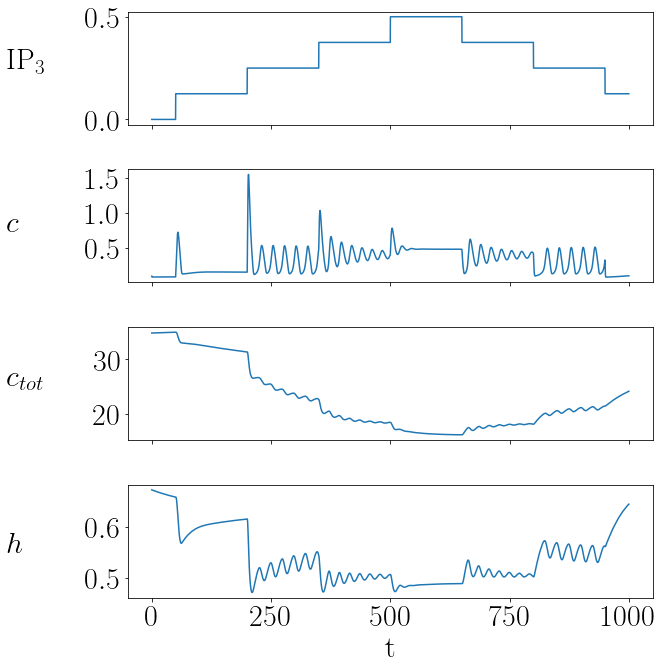

In [240]:
'''
Plot solutions Ca2+
'''
plt.figure(figsize=(10,20))

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10,10))

if(full_system):
    t_ca = t

#plot the ip3 input curve if we had set one
if('ip3_input_type' in sol.keys() and sol['ip3_input_type'] != None):
    t_ip3, p = get_input_plot(sol['ip3_input_type'])
else:
    t_ip3 = t_ca

#plot figures
ax[0].plot(t_ip3, p)
ax[1].plot(t_ca, c)
ax[2].plot(t_ca, c_tot)
ax[3].plot(t_ca, h)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$c$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$c_{tot}$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$h$', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.35)

fig.tight_layout()

### MP Example

And here we use a curve defined in the Handy paper to produce a MP type Ca2+ transient

<Figure size 720x1440 with 0 Axes>

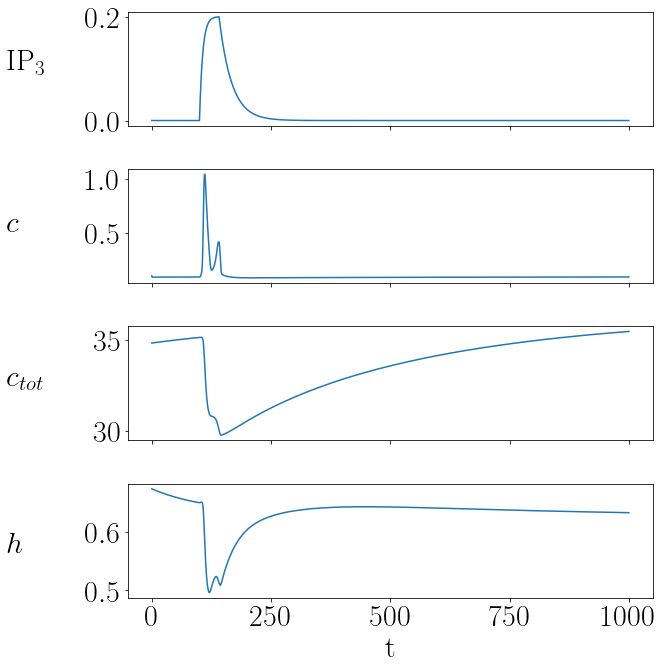

In [254]:
'''
Plot solutions Ca2+
'''
plt.figure(figsize=(10,20))

fig, ax = plt.subplots(4, 1, sharex=True, figsize=(10,10))

if(full_system):
    t_ca = t

#plot the ip3 input curve if we had set one
if('ip3_input_type' in sol.keys() and sol['ip3_input_type'] != None):
    t_ip3, p = get_input_plot(sol['ip3_input_type'])
else:
    t_ip3 = t_ca

#plot figures
ax[0].plot(t_ip3, p)
ax[1].plot(t_ca, c)
ax[2].plot(t_ca, c_tot)
ax[3].plot(t_ca, h)

#set xlabel
ax[3].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$c$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$c_{tot}$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$h$', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.35)

fig.tight_layout()

## Glutamate GPCR plot

Here is an example response of the glutamate GPCR system to a quick pulse of glutamate, replicating the original code from Yousef

<Figure size 720x1440 with 0 Axes>

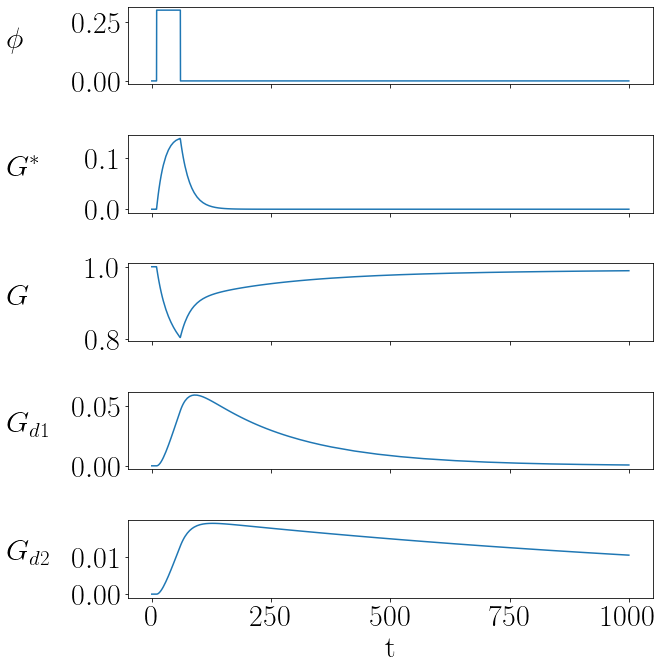

In [252]:
'''
Plot solutions GPCR
'''
plt.figure(figsize=(10,20))

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(10,10))
if(full_system):
    t_G = t

glut_t, glut = get_glutamate_input_plot(sol.glutamate_input_type)
    
#plot figures
ax[0].plot(glut_t, glut)
ax[1].plot(t_G, Gstar)
ax[2].plot(t_G, G)
ax[3].plot(t_G, Gd1)
ax[4].plot(t_G, Gd2)

#set xlabel
ax[4].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'$\phi$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$G$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$G_{d1}$', rotation='horizontal', ha='left')
ax[4].set_ylabel(r'$G_{d2}$', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.35)
ax[4].get_yaxis().set_label_coords(-0.23,0.35)

fig.tight_layout()

## Key Systems Plot

This is just a combination of the most important pieces of the GPCR and IP3/Ca2+ systems. This is what the full system looks like in response to a quick pulse of glutamate

<Figure size 720x1440 with 0 Axes>

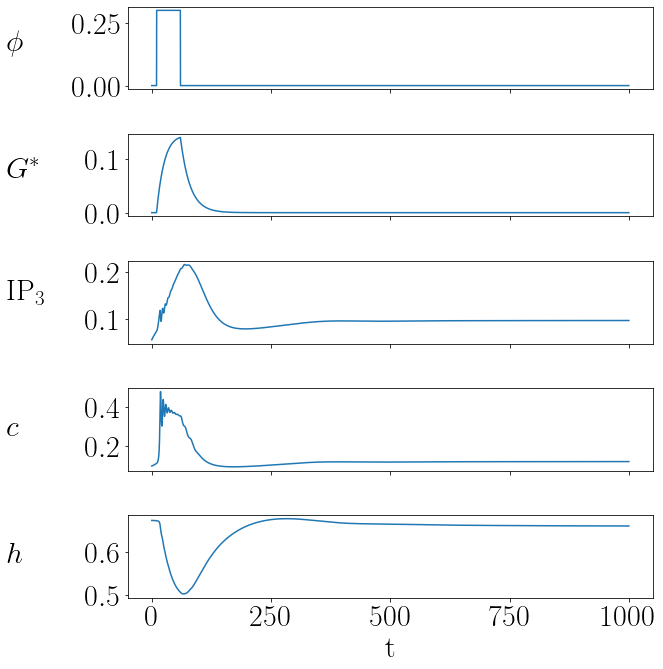

In [21]:
'''
Plot solutions Ca2+
'''
plt.figure(figsize=(10,20))

fig, ax = plt.subplots(5, 1, sharex=True, figsize=(10,10))

glut_t, glut = get_input_plot(sol.glutamate_input_type)

#plot figures
ax[0].plot(glut_t, glut)
ax[1].plot(t, Gstar)
ax[2].plot(t, p)
ax[3].plot(t, c)
ax[4].plot(t, h)

#set xlabel
ax[4].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'$\phi$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$c$', rotation='horizontal', ha='left')
ax[4].set_ylabel(r'$h$', rotation='horizontal', ha='left')

#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.35)
ax[4].get_yaxis().set_label_coords(-0.23,0.35)

fig.tight_layout()

### IP3 and Ca2+ wiggling behavior

I noticed that there was a bit of wiggling in the IP3 and Calcium traces after our step increase of glutamate. I inspected this further, comparing the peaks of IP3 during the wiggling against those of Ca2+. Ca2+ peaks slightly after IP3, since it is driven by IP3. Subsequently, the increase in Ca2+ drives the degradation of IP3, and since our equations give a quartic strength, the degradation rate is highly sensitive to changes in Ca2+, causing the wiggling.

Here, we plot 3 versions of the graph changing the amount of strength of calcium-induced IP3 degradation. Too much and we have wiggling (roughly $v_{3k} > 0.2$), but it appears to have some smoothing effects that may be desirable (compare the dip when feedback is turned off -- we need to know what behavior is desired when given a long pulse of glutamate, but pretty sure it is a PL type)

In [10]:
def find_local_maxima(y):
    '''
    Return the indices of local maxima by returning a list of turning
    points in the values
    '''
    indices = []
    values = []
    for i in range(len(y)):
        if(i == 0 or i == len(y) - 1):
            pass
        else:
            if(y[i] > y[i-1] and y[i] > y[i+1]):
                indices.append(i)
                values.append(y[i])
    return indices, values
    
def plot_vertical_lines(x, y_min, y_max, c=None):
    '''
    plot dashed vertical lines at the given x values with length given
    '''
    if(c is None):
        plt.plot([x, x], [y_min, y_max], linestyle='--', alpha=0.5)
    else:
        plt.plot([x, x], [y_min, y_max], linestyle='--', c=c, alpha=0.5)

        
def ip3_production(Gstar, c, p):
    return v_beta*Gstar + v_delta*((k_delta)/(1 + p))*((c**2)/(c**2 + k_plcdelta**2))
    
def ip3_degradation(c, p): 
    return v_3k*((c**4)/(c**4 + k_d**4))*(p/(p+k_3)) + r_5p*p


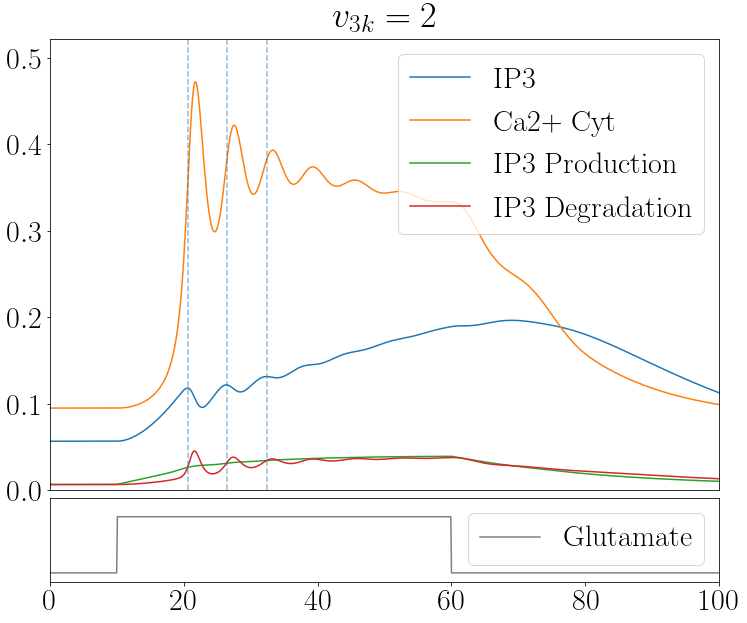

In [47]:
t_final = 100
final = np.argmax(t > t_final)

def ip3_production(Gstar, c, p):
    return v_beta*Gstar + v_delta*((k_delta)/(1 + p))*((c**2)/(c**2 + k_plcdelta**2))
    
def ip3_degradation(c, p): 
    return v_3k*((c**4)/(c**4 + k_d**4))*(p/(p+k_3)) + r_5p*p


fig = plt.figure(figsize=(12,10))
spec = gridspec.GridSpec(12, 1, figure=fig)

ax1 = fig.add_subplot(spec[:10, 0])

plt.plot(t[:final], p[:final], label='IP3')
plt.plot(t[:final], c[:final], label='Ca2+ Cyt')
plt.plot(t[:final], ip3_production(Gstar[:final], c[:final], p[:final]), label='IP3 Production')
plt.plot(t[:final], ip3_degradation(c[:final], p[:final]), label='IP3 Degradation')



#plot vertical dashed lines at IP3 maxima
ip3_maxima = find_local_maxima(p)
for x in t[ip3_maxima[0][:3]]:
    plot_vertical_lines(x, 0, c.max()+0.05, c=color_cycle[0])

ax2 = fig.add_subplot(spec[10:, 0])  
#plot glutamate
glut_t, glut = get_input_plot('pulse')
plt.plot(glut_t, glut, c='grey', label='Glutamate')

ax1.set_title(r'$v_{3k} = 2$')
ax1.set_xlim(t[0], t[final])
ax1.set_xticks([])
ax1.set_ylim(0, c.max() + 0.05)
ax2.set_xlim(t[0], t[final])
ax2.set_ylim(-0.05, 0.4)
ax2.set_yticks([])
ax1.legend()
ax2.legend()

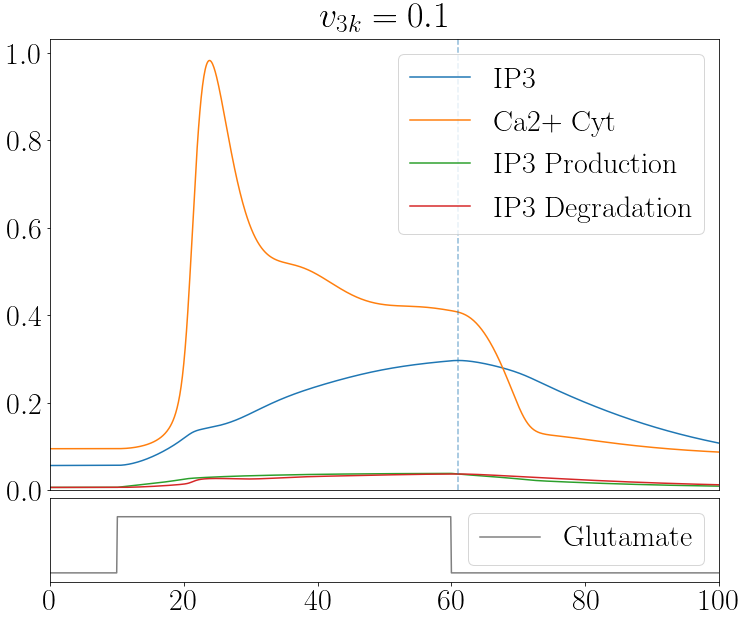

In [49]:
t_final = 100
final = np.argmax(t > t_final)

fig = plt.figure(figsize=(12,10))
spec = gridspec.GridSpec(12, 1, figure=fig)

ax1 = fig.add_subplot(spec[:10, 0])

plt.plot(t[:final], p[:final], label='IP3')
plt.plot(t[:final], c[:final], label='Ca2+ Cyt')
plt.plot(t[:final], ip3_production(Gstar[:final], c[:final], p[:final]), label='IP3 Production')
plt.plot(t[:final], ip3_degradation(c[:final], p[:final]), label='IP3 Degradation')



#plot vertical dashed lines at IP3 maxima
ip3_maxima = find_local_maxima(p)
for x in t[ip3_maxima[0][:3]]:
    plot_vertical_lines(x, 0, c.max()+0.05, c=color_cycle[0])

ax2 = fig.add_subplot(spec[10:, 0])  
#plot glutamate
glut_t, glut = get_input_plot('pulse')
plt.plot(glut_t, glut, c='grey', label='Glutamate')

ax1.set_title(r'$v_{3k} = 0.1$')
ax1.set_xlim(t[0], t[final])
ax1.set_xticks([])
ax1.set_ylim(0, c.max() + 0.05)
ax2.set_xlim(t[0], t[final])
ax2.set_ylim(-0.05, 0.4)
ax2.set_yticks([])
ax1.legend()
ax2.legend()

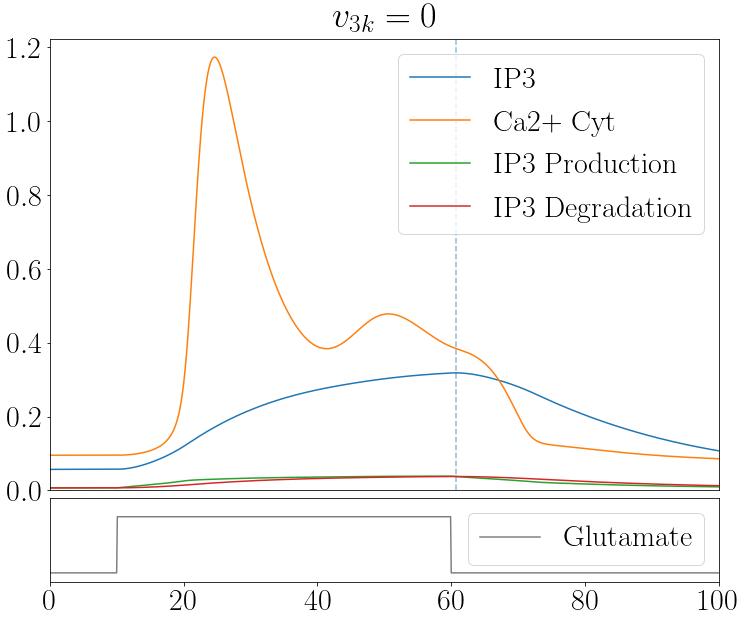

In [51]:
t_final = 100
final = np.argmax(t > t_final)

fig = plt.figure(figsize=(12,10))
spec = gridspec.GridSpec(12, 1, figure=fig)

ax1 = fig.add_subplot(spec[:10, 0])

plt.plot(t[:final], p[:final], label='IP3')
plt.plot(t[:final], c[:final], label='Ca2+ Cyt')
plt.plot(t[:final], ip3_production(Gstar[:final], c[:final], p[:final]), label='IP3 Production')
plt.plot(t[:final], ip3_degradation(c[:final], p[:final]), label='IP3 Degradation')



#plot vertical dashed lines at IP3 maxima
ip3_maxima = find_local_maxima(p)
for x in t[ip3_maxima[0][:3]]:
    plot_vertical_lines(x, 0, c.max()+0.05, c=color_cycle[0])

ax2 = fig.add_subplot(spec[10:, 0])  
#plot glutamate
glut_t, glut = get_input_plot('pulse')
plt.plot(glut_t, glut, c='grey', label='Glutamate')

ax1.set_title(r'$v_{3k} = 0$')
ax1.set_xlim(t[0], t[final])
ax1.set_xticks([])
ax1.set_ylim(0, c.max() + 0.05)
ax2.set_xlim(t[0], t[final])
ax2.set_ylim(-0.05, 0.4)
ax2.set_yticks([])
ax1.legend()
ax2.legend()

# Adjusting Parameters for Steady State

Here we are trying to adjust the parameters such that the IP3/Ca system has the correct steady state values when no glutamate input is given. Note that no glutamate --> no G* activation, so we can look only at the IP3, Ca, h system

## Base Parameters

In [32]:
sol = scipy.integrate.solve_ivp(all_ode_equations, [t_0, t_f], all_init, 
                                method='Radau', args=['none'],
                               max_step=0.1)


full_system = True

t = sol.t
c = sol.y[0]
c_tot = sol.y[1]
c_er = (c_tot - c) * gamma
h = sol.y[2]
p = sol.y[3]

#First compute some derivative values that will be needed
#for h and IP3R dynamics
m_inf = p / (p + d1)
n_inf = c / (c + d5)
Q2 = d2 * (p + d1) / (p + d3)
h_inf = Q2 / (Q2 + c)
tau_h = 1 / (a2 * (Q2 + c))

#Compute the fluxes through each channel
J_ip3r = v_ip3r * (m_inf**3) * (n_inf**3) * (h**3) * (c_er - c)
J_serca = v_serca * (c**1.75) / (c**1.75 + k_serca**1.75)
J_pmca = v_pmca * (c**2) / (c**2 + k_pmca**2)
J_soc = v_soc * (k_soc**4) / (k_soc**4 + c_er**4)

#leak fluxes
J_er_leak = v_er_leak * (c_er - c) #ER <-> Cyt leak
J_ecs_add = v_in - k_out * c #Cyt <-> extracellular leak

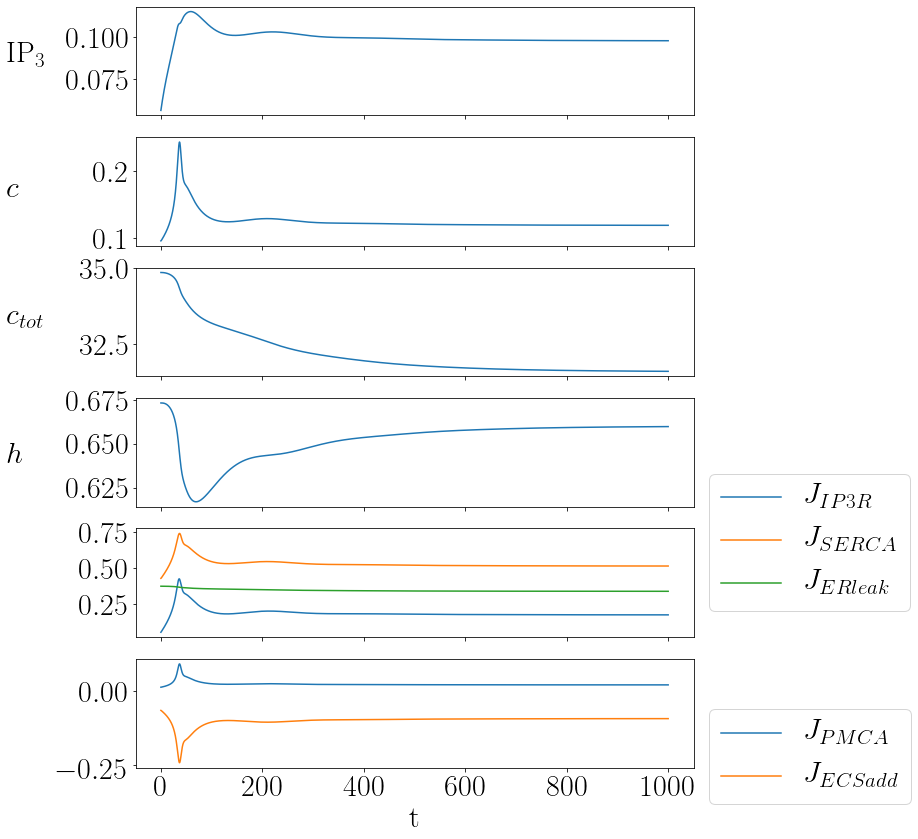

In [39]:
fig, ax = plt.subplots(6, 1, sharex=True, figsize=(10,14))

#glut_t, glut = get_glutamate_input_plot(sol.glutamate_input_type)

#plot figures
ax[0].plot(t, p)
ax[1].plot(t, c)
ax[2].plot(t, c_tot)
ax[3].plot(t, h)

#plot ER/cytosol fluxes
ax[4].plot(t, J_ip3r, label=r'$J_{IP3R}$')
ax[4].plot(t, J_serca, label=r'$J_{SERCA}$')
ax[4].plot(t, J_er_leak, label=r'$J_{ERleak}$')

#plot cytosol/extracellular fluxes
ax[5].plot(t, J_pmca, label=r'$J_{PMCA}$')
ax[5].plot(t, J_ecs_add, label=r'$J_{ECSadd}$')


#set xlabel
ax[5].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$c$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$c_{tot}$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$h$', rotation='horizontal', ha='left')


#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.35)
# ax[4].get_yaxis().set_label_coords(-0.23,0.35)

ax[4].legend(bbox_to_anchor=(1, 0.1), loc='lower left')
ax[5].legend(bbox_to_anchor=(1, 0.1), loc='center left')

# fig.tight_layout()

fig.savefig('figures/ip3_no_glut_fitting/base', bbox_inches='tight')

## Increasing r_5p to increase IP3 degradation

At the base level, it seems like IP3 increases from its supposed steady state without any glutamate response. We can adjust this in a few ways, but it seems like turning up degradation might balance this out

In [71]:
r_5p = 0.11814 #0.08

sol = scipy.integrate.solve_ivp(all_ode_equations, [t_0, t_f], all_init, 
                                method='Radau', args=['none'],
                               max_step=0.1)


full_system = True

t = sol.t
c = sol.y[0]
c_tot = sol.y[1]
c_er = (c_tot - c) * gamma
h = sol.y[2]
p = sol.y[3]
Gstar = sol.y[4]

glut_t, glut = get_input_plot('none')
#First compute some derivative values that will be needed
#for h and IP3R dynamics
m_inf = p / (p + d1)
n_inf = c / (c + d5)
Q2 = d2 * (p + d1) / (p + d3)
h_inf = Q2 / (Q2 + c)
tau_h = 1 / (a2 * (Q2 + c))

#Compute the fluxes through each channel
J_ip3r = v_ip3r * (m_inf**3) * (n_inf**3) * (h**3) * (c_er - c)
J_serca = v_serca * (c**1.75) / (c**1.75 + k_serca**1.75)
J_pmca = v_pmca * (c**2) / (c**2 + k_pmca**2)
J_soc = v_soc * (k_soc**4) / (k_soc**4 + c_er**4)

#leak fluxes
J_er_leak = v_er_leak * (c_er - c) #ER <-> Cyt leak
J_ecs_add = v_in - k_out * c #Cyt <-> extracellular leak


r_5p = 0.08

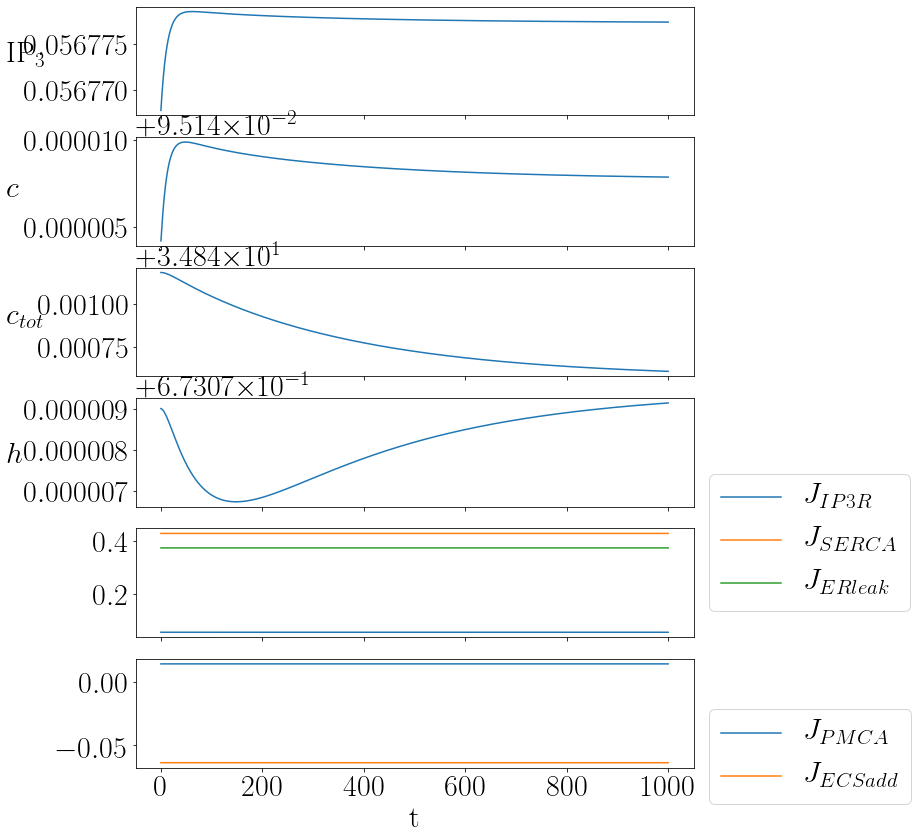

In [72]:
fig, ax = plt.subplots(6, 1, sharex=True, figsize=(10,14))

#glut_t, glut = get_glutamate_input_plot(sol.glutamate_input_type)

#plot figures
ax[0].plot(t, p)
ax[1].plot(t, c)
ax[2].plot(t, c_tot)
ax[3].plot(t, h)

#plot ER/cytosol fluxes
ax[4].plot(t, J_ip3r, label=r'$J_{IP3R}$')
ax[4].plot(t, J_serca, label=r'$J_{SERCA}$')
ax[4].plot(t, J_er_leak, label=r'$J_{ERleak}$')

#plot cytosol/extracellular fluxes
ax[5].plot(t, J_pmca, label=r'$J_{PMCA}$')
ax[5].plot(t, J_ecs_add, label=r'$J_{ECSadd}$')


#set xlabel
ax[5].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$c$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'$c_{tot}$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$h$', rotation='horizontal', ha='left')


#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.35)
# ax[4].get_yaxis().set_label_coords(-0.23,0.35)

ax[4].legend(bbox_to_anchor=(1, 0.1), loc='lower left')
ax[5].legend(bbox_to_anchor=(1, 0.1), loc='center left')

# fig.tight_layout()

fig.savefig('figures/ip3_no_glut_fitting/r_5p_up', bbox_inches='tight')

### Checking this with glutamate input to see how it responds

It looks kind of like it responds in a similar fashion to before we changed anything, so maybe this was enough to fix the problem?

In [65]:
r_5p = 0.11814 #0.08

sol = scipy.integrate.solve_ivp(all_ode_equations, [t_0, t_f], all_init, 
                                method='Radau', args=['pulse'],
                               max_step=0.1)


full_system = True

t = sol.t
c = sol.y[0]
c_tot = sol.y[1]
c_er = (c_tot - c) * gamma
h = sol.y[2]
p = sol.y[3]
Gstar = sol.y[4]

glut_t, glut = get_input_plot('pulse')
#First compute some derivative values that will be needed
#for h and IP3R dynamics
m_inf = p / (p + d1)
n_inf = c / (c + d5)
Q2 = d2 * (p + d1) / (p + d3)
h_inf = Q2 / (Q2 + c)
tau_h = 1 / (a2 * (Q2 + c))

#Compute the fluxes through each channel
J_ip3r = v_ip3r * (m_inf**3) * (n_inf**3) * (h**3) * (c_er - c)
J_serca = v_serca * (c**1.75) / (c**1.75 + k_serca**1.75)
J_pmca = v_pmca * (c**2) / (c**2 + k_pmca**2)
J_soc = v_soc * (k_soc**4) / (k_soc**4 + c_er**4)

#leak fluxes
J_er_leak = v_er_leak * (c_er - c) #ER <-> Cyt leak
J_ecs_add = v_in - k_out * c #Cyt <-> extracellular leak


r_5p = 0.08

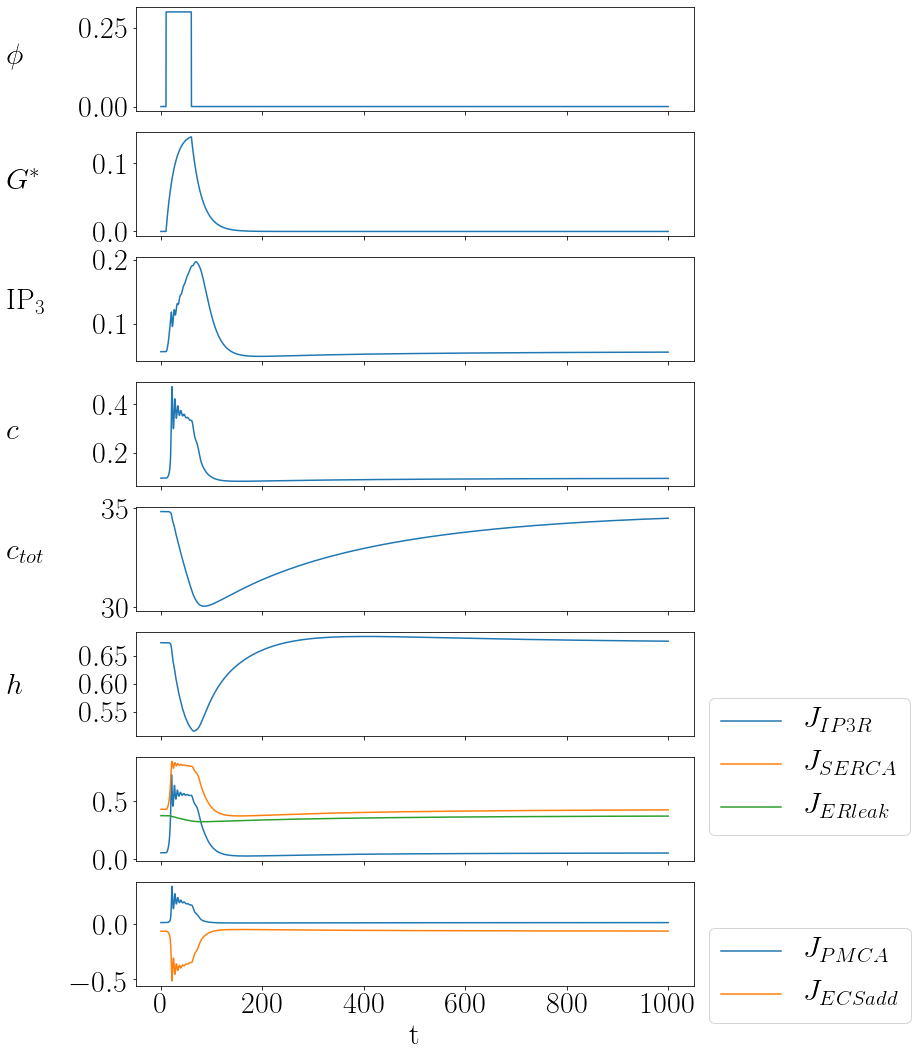

In [68]:
fig, ax = plt.subplots(8, 1, sharex=True, figsize=(10,18))

#glut_t, glut = get_glutamate_input_plot(sol.glutamate_input_type)

#plot figures
ax[0].plot(glut_t, glut)
ax[1].plot(t, Gstar)
ax[2].plot(t, p)
ax[3].plot(t, c)
ax[4].plot(t, c_tot)
ax[5].plot(t, h)

#plot ER/cytosol fluxes
ax[6].plot(t, J_ip3r, label=r'$J_{IP3R}$')
ax[6].plot(t, J_serca, label=r'$J_{SERCA}$')
ax[6].plot(t, J_er_leak, label=r'$J_{ERleak}$')

#plot cytosol/extracellular fluxes
ax[7].plot(t, J_pmca, label=r'$J_{PMCA}$')
ax[7].plot(t, J_ecs_add, label=r'$J_{ECSadd}$')


#set xlabel
ax[7].set_xlabel('t')

#set ylabels
ax[0].set_ylabel(r'$\phi$', rotation='horizontal', ha='left')
ax[1].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[2].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[3].set_ylabel(r'$c$', rotation='horizontal', ha='left')
ax[4].set_ylabel(r'$c_{tot}$', rotation='horizontal', ha='left')
ax[5].set_ylabel(r'$h$', rotation='horizontal', ha='left')


#align ylabels
ax[0].get_yaxis().set_label_coords(-0.23,0.4)
ax[1].get_yaxis().set_label_coords(-0.23,0.4)
ax[2].get_yaxis().set_label_coords(-0.23,0.4)
ax[3].get_yaxis().set_label_coords(-0.23,0.4)
ax[4].get_yaxis().set_label_coords(-0.23,0.4)
ax[5].get_yaxis().set_label_coords(-0.23,0.35)
# ax[4].get_yaxis().set_label_coords(-0.23,0.35)

ax[6].legend(bbox_to_anchor=(1, 0.1), loc='lower left')
ax[7].legend(bbox_to_anchor=(1, 0.1), loc='center left')

# fig.tight_layout()

fig.savefig('figures/ip3_no_glut_fitting/r_5p_up_full_system', bbox_inches='tight')

## Glutamate Step

Due to the recovery time of the glutamate GPCR, we need to do trials separately

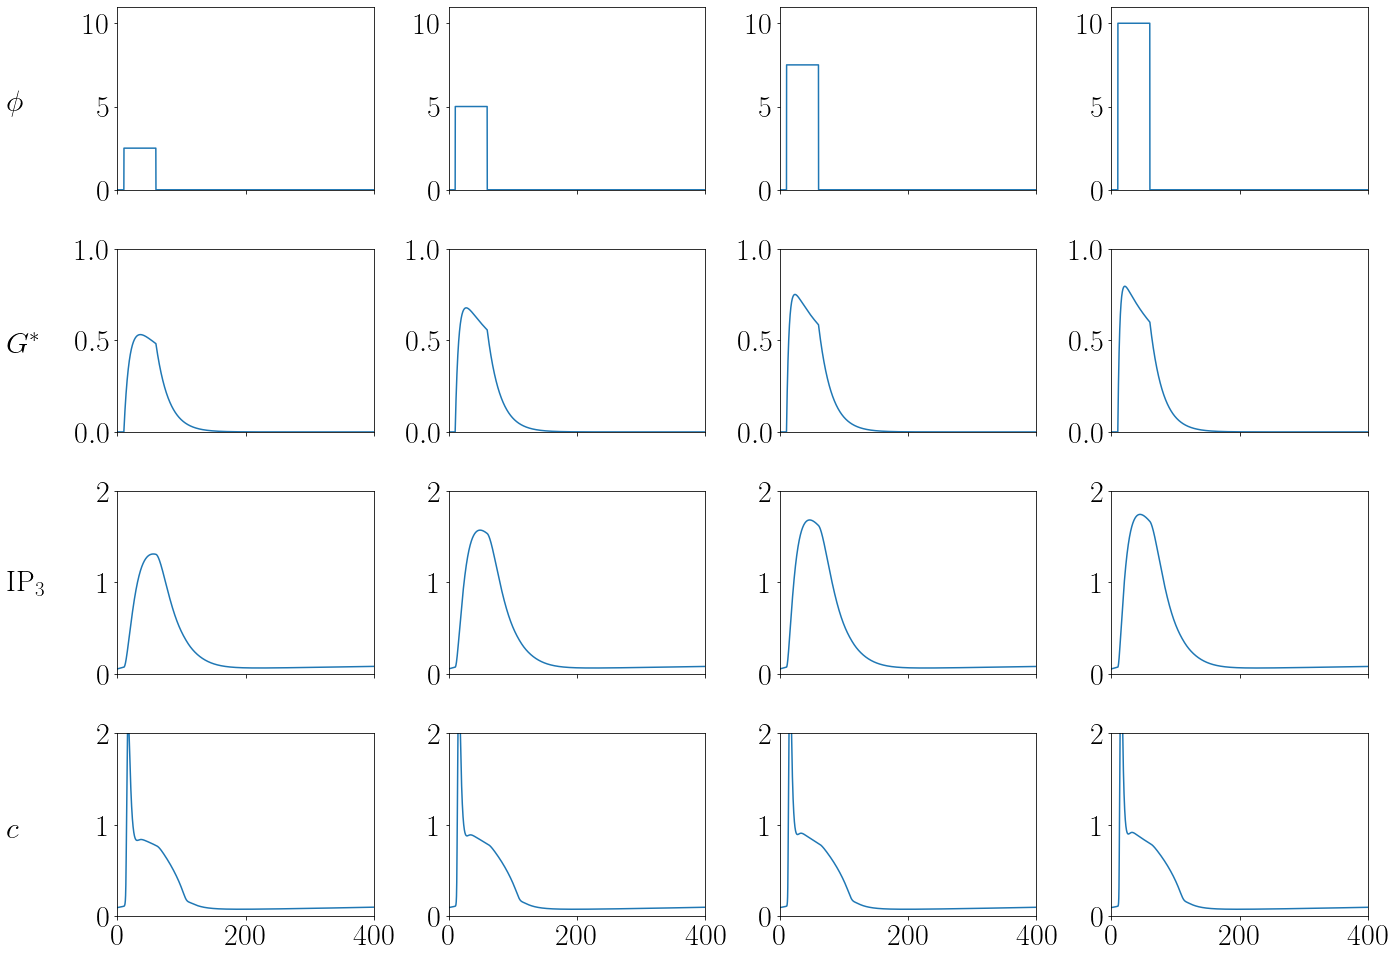

In [132]:
fig, ax = plt.subplots(4, 4, sharex=True, figsize=(20,14))
glut_maxes = [2.5, 5, 7.5, 10]

load = True
sols = []

for i in range(4):
    glut_max = glut_maxes[i]
    
    if(load):
        sols = pickle.load(open('data/glutamate_step_ip3_c_solutions_2.5_5_7.5_10_no_feedback', 'rb'))
    else:
        sols.append( scipy.integrate.solve_ivp(all_ode_equations, [t_0, t_f], all_init, 
                                method='Radau', args=['pulse'],
                               max_step=0.1) )
    
    t = sols[i].t
    Gstar = sols[i].y[4]
    c = sols[i].y[0]
    p = sols[i].y[3]
    glut_t, glut = get_input_plot('pulse')
    
    
    ax[0, i].plot(glut_t, glut)
    ax[1, i].plot(t, Gstar)
    ax[2, i].plot(t, p)
    ax[3, i].plot(t, c)
    
    ax[3, i].set_xlim([0, 400])
    
    ax[0, i].set_ylim([0, 11])
    ax[1, i].set_ylim([0, 1])
    ax[2, i].set_ylim([0, 2])
    ax[3, i].set_ylim([0, 2])

#set ylabels
ax[0, 0].set_ylabel(r'$\phi$', rotation='horizontal', ha='left')
ax[1, 0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[2, 0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[3, 0].set_ylabel(r'$c$', rotation='horizontal', ha='left')
# ax[4].set_ylabel(r'$c_{tot}$', rotation='horizontal', ha='left')
# ax[5].set_ylabel(r'$h$', rotation='horizontal', ha='left')


#align ylabels
ax[0, 0].get_yaxis().set_label_coords(-0.43,0.4)
ax[1, 0].get_yaxis().set_label_coords(-0.43,0.4)
ax[2, 0].get_yaxis().set_label_coords(-0.43,0.4)
ax[3, 0].get_yaxis().set_label_coords(-0.43,0.4)
# ax[4].get_yaxis().set_label_coords(-0.23,0.4)
# ax[5].get_yaxis().set_label_coords(-0.23,0.35)
# ax[4].get_yaxis().set_label_coords(-0.23,0.35)

# ax[6].legend(bbox_to_anchor=(1, 0.1), loc='lower left')
# ax[7].legend(bbox_to_anchor=(1, 0.1), loc='center left')

fig.tight_layout()

fig.savefig('figures/ip3_no_glut_fitting/glutamate_step_separate_no_feedback', bbox_inches='tight')

if(load == False):
    pickle.dump(sols, open('data/glutamate_step_ip3_c_solutions_2.5_5_7.5_10_no_feedback', 'wb'))

glut_max = 10

### Gstar Steps

Curious to see if any level of Gstar can even produce oscillations in calcium like we expect to be able to (?), note that for these simulations we manually change a line in all_ode_equations to use a the glutamate_pulse_input function for Gstar (changed it earlier in the chain so its hard to forget to remove it)

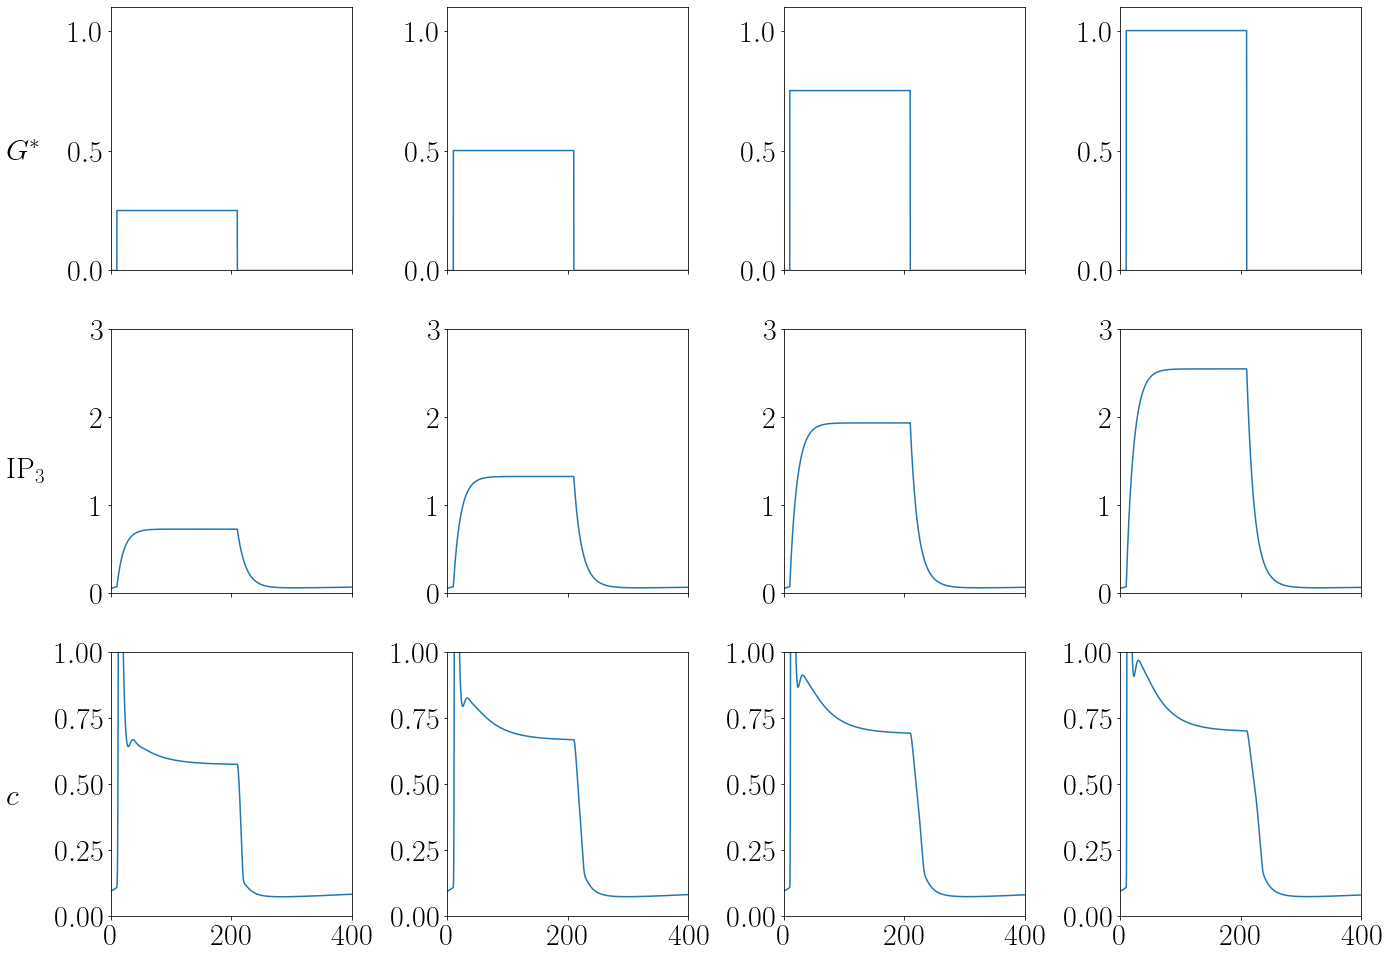

In [53]:
fig, ax = plt.subplots(3, 4, sharex=True, figsize=(20,14))
Gstar_maxes = [0.25, 0.5, 0.75, 1.0]
glut_duration = 200

#whether to reconstruct the data or load from saved
load = True
sols = []

for i in range(4):
    glut_max = Gstar_maxes[i]
    
    if(load):
        sols = pickle.load(open('data/Gstar_step_ip3_c_solutions_.25_.5_.75_1_no_feedback', 'rb'))
    else:
        sols.append( scipy.integrate.solve_ivp(all_ode_equations, [t_0, t_f], all_init, 
                                method='Radau', args=['pulse'],
                               max_step=0.01) )
    
    t = sols[i].t
    Gstar = sols[i].y[4]
    c = sols[i].y[0]
    p = sols[i].y[3]    
    
    ax[0, i].plot(t, Gstar)
    ax[1, i].plot(t, p)
    ax[2, i].plot(t, c)
    
    ax[2, i].set_xlim([0, 400])
    
    ax[0, i].set_ylim([0, 1.1])
    ax[1, i].set_ylim([0, 3])
    ax[2, i].set_ylim([0, 1])

#set ylabels
ax[0, 0].set_ylabel(r'$G^*$', rotation='horizontal', ha='left')
ax[1, 0].set_ylabel(r'IP$_3$', rotation='horizontal', ha='left')
ax[2, 0].set_ylabel(r'$c$', rotation='horizontal', ha='left')
# ax[4].set_ylabel(r'$c_{tot}$', rotation='horizontal', ha='left')
# ax[5].set_ylabel(r'$h$', rotation='horizontal', ha='left')


#align ylabels
ax[0, 0].get_yaxis().set_label_coords(-0.43,0.4)
ax[1, 0].get_yaxis().set_label_coords(-0.43,0.4)
ax[2, 0].get_yaxis().set_label_coords(-0.43,0.4)
# ax[4].get_yaxis().set_label_coords(-0.23,0.4)
# ax[5].get_yaxis().set_label_coords(-0.23,0.35)
# ax[4].get_yaxis().set_label_coords(-0.23,0.35)

# ax[6].legend(bbox_to_anchor=(1, 0.1), loc='lower left')
# ax[7].legend(bbox_to_anchor=(1, 0.1), loc='center left')

fig.tight_layout()

fig.savefig('figures/ip3_no_glut_fitting/glutamate_step_separate_no_feedback', bbox_inches='tight')

if(load == False):
    pickle.dump(sols, open('data/Gstar_step_ip3_c_solutions_.25_.5_.75_1_no_feedback', 'wb'))

glut_duration = 50
glut_max = 10